In [1]:
# Import library
import psycopg2

In [3]:
# Create a connection
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=udacity user=postgres password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
conn.set_session(autocommit=True)

#### Let's start with our normalized (3NF) database set of tables we had in the last exercise, but we have added a new table `sales`. 

`Table Name: transactions2 
column 0: transaction Id
column 1: Customer Name
column 2: Cashier Id
column 3: Year `

`Table Name: albums_sold
column 0: Album Id
column 1: Transaction Id
column 3: Album Name` 

`Table Name: employees
column 0: Employee Id
column 1: Employee Name `

`Table Name: sales
column 0: Transaction Id
column 1: Amount Spent
`

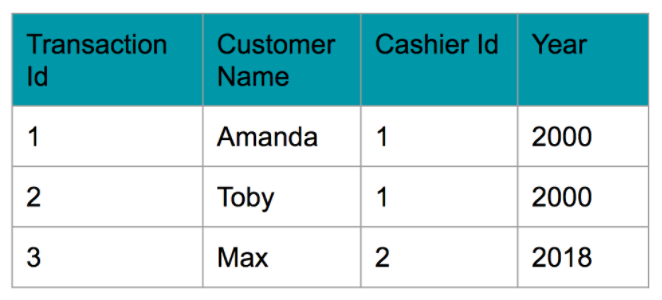

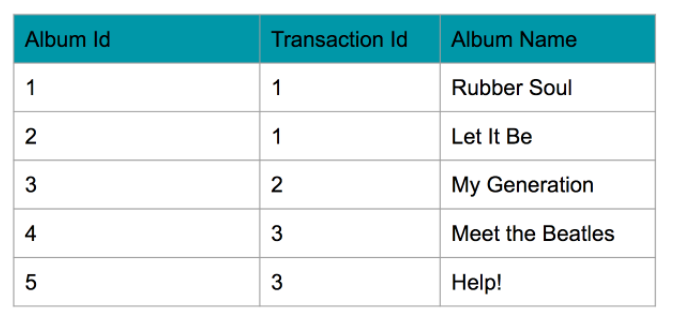

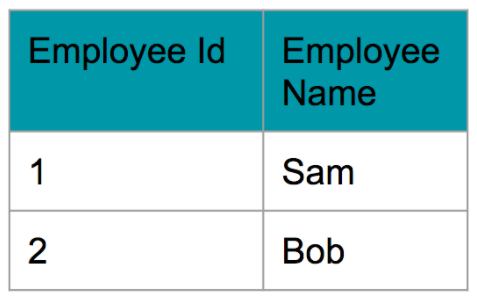

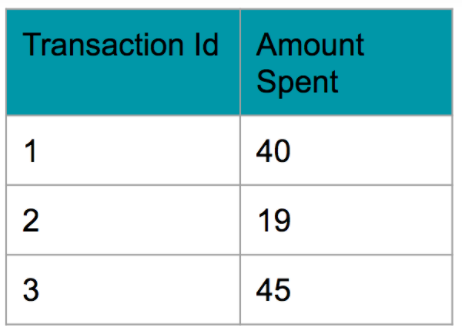

In [6]:
# Create transactions2 table
try: 
    cur.execute("CREATE table IF NOT EXISTS transactions2 (Transaction_Id int, Customer_Name varchar, Cashier_Id int, \
                                                                year int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

# Create albums_sold table
try: 
    cur.execute("CREATE table IF NOT EXISTS albums_sold (Album_Id int, Transaction_Id int, Album_Name varchar)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

# Create employees table
try: 
    cur.execute("CREATE table IF NOT EXISTS employees (Employee_Id int, Employee_Name varchar)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

# Create sales table
try: 
    cur.execute("CREATE table IF NOT EXISTS sales (Transaction_Id int, Amount_Spent int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

- Insert into tables

In [8]:
# Insert data into transactions 2 table

data_tuple = ((1, "Amanda", 1, 2000),
              (2, "Toby", 1, 2000),
              (3, "Max", 2, 2018)

)

try: 
    cur.executemany("INSERT INTO transactions2 (transaction_id, customer_name, cashier_id, year) \
                 VALUES (%s, %s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
# Insert data into albums_sold table

data_tuple = ((1, 1, "Rubber Soul"),
              (2, 1, "Let It Be"),
              (3, 2, "My Generation"),
              (4, 3, "Meet the Beatles"),
              (5, 3, "Help!")

)

try: 
    cur.executemany("INSERT INTO albums_sold (album_id, transaction_id, album_name) \
                 VALUES (%s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
# Insert data into employees table

data_tuple = ((1, "Sam"),
              (2, "Bob")

)


try: 
    cur.executemany("INSERT INTO employees (employee_id, employee_name) \
                 VALUES (%s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

# Insert data into sales table

data_tuple = ((1, 40),
              (2, 19),
              (3, 45)
)

try: 
    cur.executemany("INSERT INTO sales (transaction_id, amount_spent) \
                 VALUES (%s, %s)", data_tuple)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)  

__Print out the tables

In [10]:
print("Table: transactions2\n")
try: 
    cur.execute("SELECT * FROM transactions2;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: albums_sold\n")
try: 
    cur.execute("SELECT * FROM albums_sold;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: employees\n")
try: 
    cur.execute("SELECT * FROM employees;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()
    
print("\nTable: sales\n")
try: 
    cur.execute("SELECT * FROM sales;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

Table: transactions2

(1, 'Amanda', 1, 2000)
(2, 'Toby', 1, 2000)
(3, 'Max', 2, 2018)

Table: albums_sold

(1, 1, 'Rubber Soul')
(2, 1, 'Let It Be')
(3, 2, 'My Generation')
(4, 3, 'Meet the Beatles')
(5, 3, 'Help!')

Table: employees

(1, 'Sam')
(2, 'Bob')

Table: sales

(1, 40)
(2, 19)
(3, 45)


### Perform a query that gives the following:

 
`Table Name: transactions2 
column 0: transaction Id x
column 1: Customer Name x
column 2: Cashier Id
column 3: Year x`

`Table Name: albums_sold
column 0: Album Id
column 1: Transaction Id
column 3: Album Name x` 

`Table Name: employees
column 0: Employee Id
column 1: Employee Name x`

`Table Name: sales
column 0: Transaction Id
column 1: Amount Spent x
`


`transaction_id
 customer_name
 cashier name
 year 
 albums sold
 amount sold`
 
 - This involves a 3 way JOIN
 
 

In [13]:
# Lets execute the query

try:
    cur.execute("SELECT T.transaction_id, T.customer_name, T.year, A.album_name, E.employee_name, S.amount_spent\
                FROM transactions2 AS T \
                JOIN albums_sold AS A ON T.transaction_id = A.transaction_id \
                JOIN employees AS E ON T.cashier_id = E.employee_id \
                JOIN sales AS S ON T.transaction_id = S.transaction_id;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Amanda', 2000, 'Rubber Soul', 'Sam', 40)
(1, 'Amanda', 2000, 'Let It Be', 'Sam', 40)
(2, 'Toby', 2000, 'My Generation', 'Sam', 19)
(3, 'Max', 2018, 'Meet the Beatles', 'Bob', 45)
(3, 'Max', 2018, 'Help!', 'Bob', 45)


#### Great we were able to get the data we wanted.

### But, we had to perform a 3 way `JOIN` to get there. While it's great we had that flexibility, we need to remember that `JOINS` are slow and if we have a read heavy workload that required low latency queries we want to reduce the number of `JOINS`.  Let's think about denormalizing our normalized tables.

### With denormalization you want to think about the queries you are running and how to reduce the number of JOINS even if that means duplicating data. The following are the queries you need to run.

#### Query 1 : `select transaction_id, customer_name, amount_spent FROM <min number of tables>` 
It should generate the amount spent on each transaction 
#### Query 2: `select cashier_name, SUM(amount_spent) FROM <min number of tables> GROUP BY cashier_name` 
It should generate the total sales by cashier 

#### Query 1 : `select transaction_id, customer_name, amount_spent FROM <min number of tables>` 
It should generate the amount spent on each transaction

- For query 1, lets create create table transaction with the following attributes:

`transaction_id,
customer_name,
cashier_id,
year,
amount_spent`

In [16]:
try: 
    cur.execute("CREATE table IF NOT EXISTS transactions (transaction_id int, customer_name varchar, cashier_id int, year int, \
                                                                amount_spent int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

__To chieve this we do the following__:

- JOIN the 2 tables transactions2 and sales
- Extract the necessary attributes like `transaction_id, customer_name, cashier_id, year, amount_spent`.

In [17]:
# First generate a data_tuple by JOINING the 2 tables and extracting the said-attributes
try:
    cur.execute("SELECT T.transaction_id, customer_name, cashier_id, year, amount_spent\
                FROM transactions2 AS T \
                JOIN sales AS S ON T.transaction_id = S.transaction_id;")
except psycopg2.Error as e: 
    print (e)

data_tuple = tuple(cur.fetchall())

# Insert the data tuple into transactions table

try: 
    cur.executemany("INSERT INTO transactions (transaction_id, customer_name, cashier_id, year, amount_spent) \
                 VALUES (%s, %s, %s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print (e)

- Lets query the transaction table

In [18]:
try: 
    cur.execute("SELECT transaction_ID, Customer_Name, Amount_Spent FROM transactions")
        
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

(1, 'Amanda', 40)
(2, 'Toby', 19)
(3, 'Max', 45)


#### Query 2: `select cashier_name, SUM(amount_spent) FROM <min number of tables> GROUP BY cashier_name` 
It should generate the total sales by cashier 

To avoid using any `JOINS`, first create a new table with just the information we need. 

`Table Name: cashier_sales
col: Transaction Id
Col: Cashier Name
Col: Cashier Id
col: Amount_Spent
`

To achieve this:
- Create a table cashier_sales
- we make a query that join transactions2 and sales table
- the JOINED table should have `transaction_id, cashier_name, cashier_id, amount_spent`

In [20]:
# Create the cashier_sales tables
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS cashier_sales (transaction_id int, cashier_name varchar, cashier_id int, \
                                                                    amount_spent int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
# First generate a data_tuple by JOINING the 2 tables and extracting the said-attributes

# employee_name in sales table = cashier_name, employee_id in sales table = cashier_id

try:
    cur.execute("SELECT T.transaction_id, employee_name, employee_id, amount_spent \
                 FROM transactions2 AS T \
                 JOIN sales AS S ON T.transaction_id = S.transaction_id \
                 JOIN employees AS E ON E.employee_id = T.cashier_id;")
except psycopg2.Error as e: 
    print (e)

data_tuple = tuple(cur.fetchall())

# Insert the data tuple into transactions table

try: 
    cur.executemany("INSERT INTO cashier_sales (transaction_id, cashier_name, cashier_id, amount_spent) \
                 VALUES (%s, %s, %s, %s)", data_tuple)
except psycopg2.Error as e: 
    print (e)

- Lets run the query

In [21]:
try: 
    cur.execute("select cashier_name, SUM(amount_spent) FROM cashier_sales GROUP BY cashier_name;")
        
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('Sam', 59)
('Bob', 45)


In [22]:
try: 
    cur.execute("DROP table album_library2") 
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_library") 
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_library2") 
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions2") 
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_store") 
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_store2") 
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table albums_sold")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table employees")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table sales")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table cashier_sales")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

Error: Dropping table
table "album_library2" does not exist

Error: Dropping table
table "music_library" does not exist

Error: Dropping table
table "music_library2" does not exist

Error: Dropping table
table "music_store" does not exist

Error: Dropping table
table "music_store2" does not exist

